In [1]:
import os
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [9]:
df = pd.read_csv("1000g_tral_panel.tsv", sep="\t", header=0)
df

,chrom,start,end,motif,motif_len,ref_cn,diffs,call_rate,avg_diffs
0,chr1,64096,64101,TG,2,3.0,0.0,0.9,0.0
1,chr1,64165,64176,CACATA,6,2.0,0.0,0.8,0.0
2,chr1,64174,64181,AT,2,4.0,0.0,1.0,0.0
3,chr1,64215,64220,ATA,3,2.0,0.0,1.0,0.0
4,chr1,64233,64240,AATT,4,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
20189360,chrY,22344566,22344571,TCC,3,2.0,0.0,0.2,0.0
20189361,chrY,22344632,22344639,TCCA,4,2.0,0.0,0.2,0.0
20189362,chrY,22344677,22344685,GGA,3,3.0,0.0,0.2,0.0
20189363,chrY,22344717,22344726,TTCTG,5,2.0,0.0,0.1,0.0


In [38]:
df[df['avg_diffs'] > 0]

,chrom,start,end,motif,motif_len,ref_cn,diffs,call_rate,avg_diffs
106,chr1,178267,178275,T,1,9.0,3.0,1.0,0.30
168,chr1,181578,181600,G,1,23.0,47.0,0.9,5.22
216,chr1,185624,185635,CCCCAC,6,2.0,1.0,1.0,0.10
217,chr1,185717,185722,TGA,3,2.0,1.0,1.0,0.10
218,chr1,185728,185733,CGG,3,2.0,1.0,1.0,0.10
...,...,...,...,...,...,...,...,...,...
20189139,chrX,156006201,156006214,TG,2,7.0,2.0,0.4,0.50
20189206,chrX,156010619,156010626,TTCC,4,2.0,2.0,0.4,0.50
20189207,chrX,156010652,156010657,CT,2,3.0,3.0,0.4,0.75
20189208,chrX,156010674,156010679,TC,2,3.0,3.0,0.4,0.75


In [28]:
def frac_variable(data, var_thresh):
    a = data.filter(items=['motif_len', 'ref_cn']).groupby('motif_len').count()
    a['var'] = data[data['avg_diffs'] > var_thresh].filter(items=['motif_len', 'ref_cn']).groupby('motif_len').count()
    a['frac_var'] = a['var'] / a['ref_cn']
    return a

            ref_cn     var  frac_var
motif_len                           
1          2615156  487008  0.186225
2          2871842  224712  0.078247
3          8765660  864841  0.098662
4          2778453  337605  0.121508
5          1004370  139405  0.138798
6          1137637  176954  0.155545
7           538936  104800  0.194457
8           239752   48254  0.201266
9           116473   30615  0.262851
10           41132    9944  0.241758
11           16385    4391  0.267989
12           29465    8784  0.298116
13           15257    5086  0.333355
14           10942    4023  0.367666
15            7905    3297  0.417078


# TRAL panel
## avg number of repeat unit differences to reference allele per sample

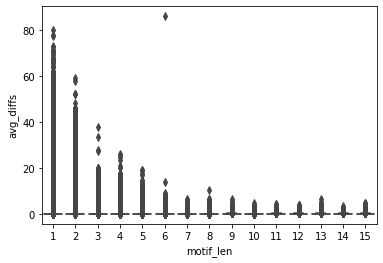

In [7]:
ax = sb.boxplot(x='motif_len', y='avg_diffs', data=df)

## avg allele sizes of str loci in reference genome

<AxesSubplot:xlabel='motif_len'>

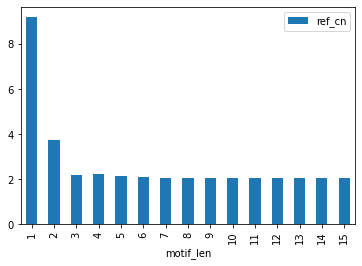

In [10]:
df.filter(items=['motif_len', 'ref_cn']).groupby(['motif_len']).mean().plot.bar()

## Select only more unstable repeat loci
### (number of differences to reference >= 5 units per sample)

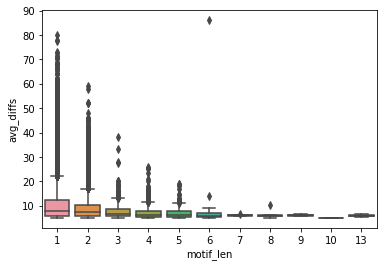

In [42]:
ax = sb.boxplot(x='motif_len', y='avg_diffs', data=df[df['avg_diffs'] >= 5])

<AxesSubplot:xlabel='motif_len'>

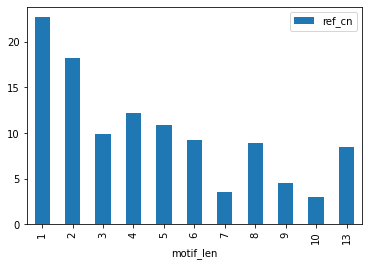

In [46]:
df[df['avg_diffs'] >= 5].filter(items=['motif_len', 'ref_cn']).groupby(['motif_len']).mean().plot.bar()

In [49]:
frac_var = frac_variable(data=df, var_thresh=5)
print(frac_var)

            ref_cn      var  frac_var
motif_len                            
1          2615156  27695.0  0.010590
2          2871842  14912.0  0.005192
3          8765660    861.0  0.000098
4          2778453   1236.0  0.000445
5          1004370    300.0  0.000299
6          1137637     32.0  0.000028
7           538936      4.0  0.000007
8           239752      7.0  0.000029
9           116473      2.0  0.000017
10           41132      NaN       NaN
11           16385      NaN       NaN
12           29465      NaN       NaN
13           15257      2.0  0.000131
14           10942      NaN       NaN
15            7905      NaN       NaN


# GangSTR panel
## avg number of repeat unit differences to reference allele per sample

In [31]:
g_df = pd.read_csv("1000g_gangstr_panel.tsv", sep="\t", header=0)
g_df

,chrom,start,end,motif,motif_len,ref_cn,diffs,call_rate,avg_diffs
0,chr1,14070,14081,CCTC,4,3.0,0.0,1.0,0.00
1,chr1,16620,16631,GCT,3,4.0,0.0,1.0,0.00
2,chr1,22812,22821,AGGAA,5,2.0,0.0,1.0,0.00
3,chr1,26454,26465,GT,2,6.0,0.0,1.0,0.00
4,chr1,31556,31570,AAAAT,5,3.0,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...
822154,chrY,56884426,56884441,TA,2,8.0,10.0,0.3,3.33
822155,chrY,56885931,56885946,TAAA,4,4.0,0.0,0.4,0.00
822156,chrY,56886168,56886179,GAAA,4,3.0,0.0,0.2,0.00
822157,chrY,56886704,56886715,AATG,4,3.0,0.0,0.5,0.00


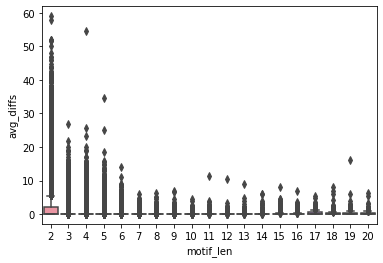

In [30]:
ax = sb.boxplot(x='motif_len', y='avg_diffs', data=g_df)

<AxesSubplot:xlabel='motif_len'>

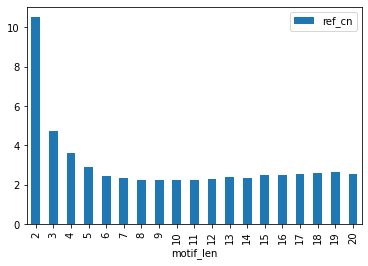

In [37]:
g_df.filter(items=['motif_len', 'ref_cn']).groupby(['motif_len']).mean().plot.bar()

## Select only more unstable repeat loci
### (number of differences to reference >= 5 units per sample)

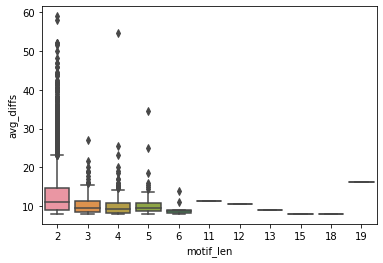

In [39]:
ax = sb.boxplot(x='motif_len', y='avg_diffs', data=g_df[g_df['avg_diffs'] >= 8])

<AxesSubplot:xlabel='motif_len'>

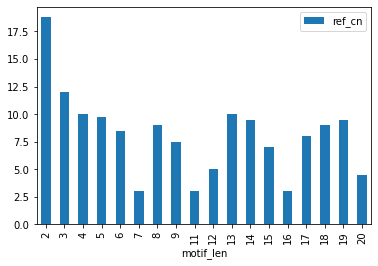

In [35]:
g_df[g_df['avg_diffs'] >= 5].filter(items=['motif_len', 'ref_cn']).groupby(['motif_len']).mean().plot.bar()

In [40]:
frac_var = frac_variable(data=g_df, var_thresh=5)
print(frac_var)

           ref_cn      var  frac_var
motif_len                           
2          121236  13846.0  0.114207
3          141344    901.0  0.006375
4          341823   1282.0  0.003750
5          162322    456.0  0.002809
6           35478     31.0  0.000874
7            8656      1.0  0.000116
8            5451      2.0  0.000367
9            1906      2.0  0.001049
10           1240      NaN       NaN
11            443      1.0  0.002257
12            389      1.0  0.002571
13            229      1.0  0.004367
14            233      2.0  0.008584
15            227      1.0  0.004405
16            275      1.0  0.003636
17            243      1.0  0.004115
18            277      3.0  0.010830
19            181      2.0  0.011050
20            206      2.0  0.009709
